#贝叶斯岭回归

在*用岭回归弥补线性回归的不足*主题中，我们介绍了岭回归优化的限制条件。我们还介绍了相关系数的先验概率分布的贝叶斯解释，将很大程度地影响着先验概率分布，先验概率分布通常均值是0。

因此，现在我们就来演示如何scikit-learn来应用这种解释。

<!-- TEASER_END -->

##Getting ready

岭回归和套索回归（lasso regression）用贝叶斯观点来解释，与频率优化观点解释相反。scikit-learn只实现了贝叶斯岭回归，但是在*How it works...*一节，我们将对比两种回归算法。

首先，我们创建一个回归数据集：

In [1]:
from sklearn.datasets import make_regression
X, y = make_regression(1000, 10, n_informative=2, noise=20)

##How to do it...

我们可以把岭回归加载进来拟合模型：

In [2]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()

有两组相关系数，分别是`alpha_1 / alpha_2`和`lambda_1 / lambda_2`。其中，`alpha_*`是先验概率分布的$\alpha$超参数，`lambda_*`是先验概率分布的$\lambda$超参数。

首先，让我们不调整参数直接拟合模型：

In [3]:
br.fit(X, y)
br.coef_

array([ -1.39241213,   0.14671513,  -0.08150797,  37.50250891,
         0.21850082,  -0.78482779,  -0.26717555,  -0.71319956,
         0.7926308 ,   5.74658302])

现在，我们来调整超参数，注意观察相关系数的变化：

In [4]:
br_alphas = BayesianRidge(alpha_1=10, lambda_1=10)
br_alphas.fit(X, y)
br_alphas.coef_

array([ -1.38807423,   0.14050794,  -0.08309391,  37.3032803 ,
         0.2254332 ,  -0.77031801,  -0.27005478,  -0.71632657,
         0.78501276,   5.71928608])

##How it works...

因为是贝叶斯岭回归，我们假设先验概率分布带有误差和$\alpha$参数，先验概率分布都服从$\Gamma$分布。

$\Gamma$分布是一种极具灵活性的分布。不同的形状参数和尺度参数的$\Gamma$分布形状有差异。**1e-06**是 scikit-learn里面`BayesianRidge`形状参数的默认参数值。

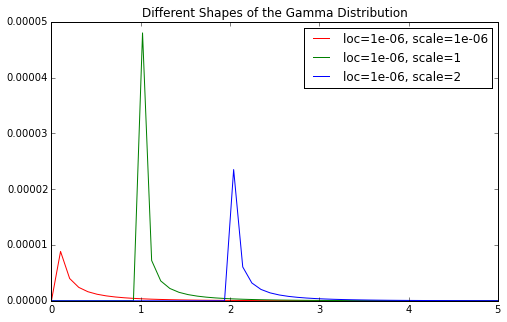

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import gamma
import numpy as np

form = lambda x, y: "loc={}, scale={}".format(x, y)
g = lambda x, y=1e-06, z=1e-06: gamma.pdf(x, y, z)
g2 = lambda x, y=1e-06, z=1: gamma.pdf(x, y, z)
g3 = lambda x, y=1e-06, z=2: gamma.pdf(x, y, z)
rng = np.linspace(0, 5)
f, ax = plt.subplots(figsize=(8, 5))

ax.plot(rng, list(map(g, rng)), label=form(1e-06, 1e-06), color='r')
ax.plot(rng, list(map(g2, rng)), label=form(1e-06, 1), color='g')
ax.plot(rng, list(map(g3, rng)), label=form(1e-06, 2), color='b')
ax.set_title("Different Shapes of the Gamma Distribution")
ax.legend();

你会看到，相关系数最终都会收缩到0，尤其当形状参数特别小的时候。

###There's more...

就像我前面介绍的，还有一种套索回归的贝叶斯解释。我们把先验概率分布看出是相关系数的函数；它们本身都是随机数。对于套索回归，我们选择一个可以产生0的分布，比如双指数分布（Double Exponential Distribution，也叫Laplace distribution）。

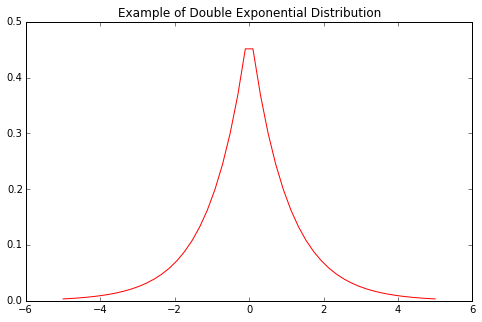

In [9]:
from scipy.stats import laplace
form = lambda x, y: "loc={}, scale={}".format(x, y)
g = lambda x: laplace.pdf(x)
rng = np.linspace(-5, 5)
f, ax = plt.subplots(figsize=(8, 5))

ax.plot(rng, list(map(g, rng)), color='r')
ax.set_title("Example of Double Exponential Distribution");

留意看x轴为0处的顶点。这将会使套索回归的相关系数为0。通过调整超参数，还有可能创建出相关系数为0的情况，这由问题的具体情况决定。